In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv('iris-data.csv')

### Shape and head 

In [3]:
iris.shape

(150, 5)

In [4]:
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


>This data set seems to be suitable for predicting class, or solving a classification problem

### Plot distributions 

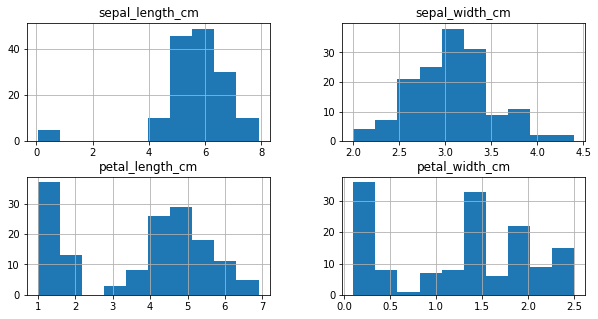

In [5]:
iris.hist(figsize=(10,5))
plt.show()

<AxesSubplot:>

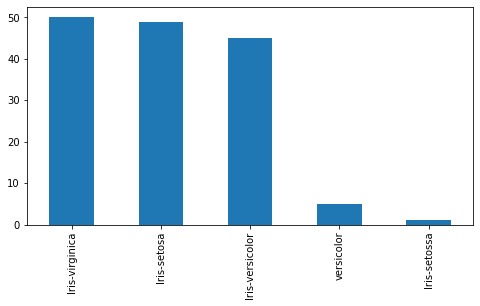

In [6]:
plt.figure(figsize=(8,4))
iris['class'].value_counts().plot.bar()

### dtypes 

In [7]:
iris.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

### Initial check for missing values 

In [8]:
iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [9]:
iris[iris.isnull().any(axis = 1) == True]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


>It is difficult to replace NaNs in this case I will drop them

In [10]:
iris = iris[iris.isnull().any(axis = 1) == False]

In [11]:
iris.shape

(145, 5)

### Describe and plot data 

In [12]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,145.000000,145.000000,145.000000,145.000000
mean,5.670303,3.046207,3.836552,1.236552
std,1.326540,0.435096,1.742955,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


>Seems like the values in `sepal_length_cm`,`sepal_width_cm`,`petal_length_cm` are within expected ranges for a flower. The minimum for `petal_width_cm`, which is only 0.1 cm, looks suspiscious. Let us investigate deeper with a plot

<AxesSubplot:xlabel='sepal_length_cm', ylabel='sepal_width_cm'>

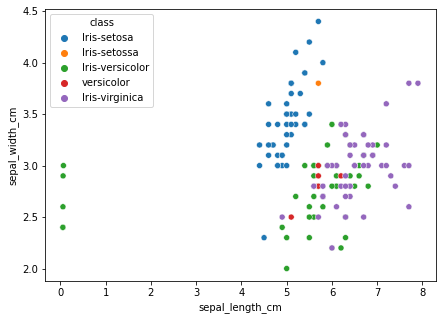

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=iris, x = 'sepal_length_cm', y  = 'sepal_width_cm', hue = 'class')

<AxesSubplot:xlabel='petal_length_cm', ylabel='petal_width_cm'>

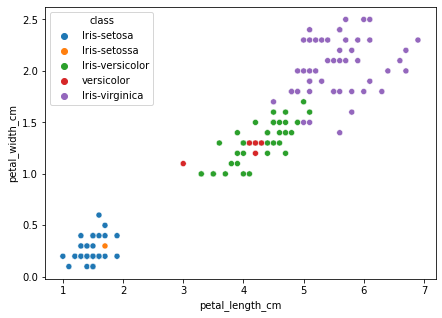

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=iris, x = 'petal_length_cm', y  = 'petal_width_cm', hue = 'class')

> All records with `petal_width_cm` belowng to `Iris-versicolor` clas. Based on a subject matter investigation into Iris-versicolor, it is possible for these flowers to have very thin sepals, so we will accept that all values in column `petal_width_cm` fall within expected range 
>
> Based on the charts above, the values in columns `sepal_length_cm`,`sepal_width_cm`,`petal_length_cm` also seems to fall within expected range, so no cleaning is required

### Additional plotting 

C:\Users\irina\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\irina\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\irina\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\irina\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


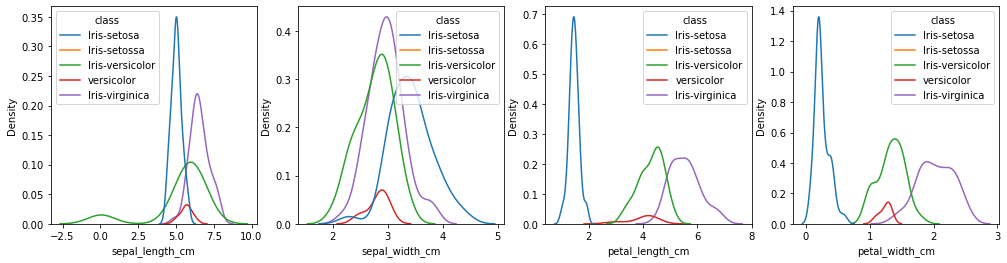

In [15]:
fix, ax = plt.subplots(ncols = 4, figsize = (17,4))

lst = list(iris.columns[:-1])

for i, el in enumerate(lst):
    #sns.histplot(data = iris, x = el, hue = 'class', ax = ax[i])
    sns.kdeplot(data = iris, x = el, hue = 'class', ax = ax[i])
plt.show()

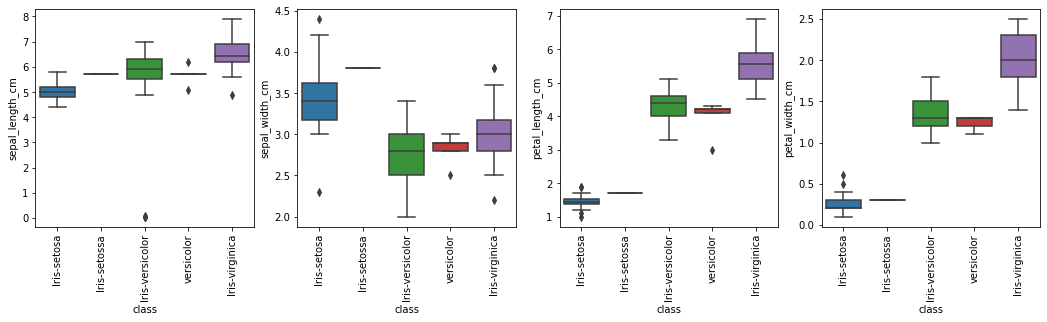

In [16]:
fix, ax = plt.subplots(ncols = 4, figsize = (18,4))

lst = list(iris.columns[:-1])

for i, el in enumerate(lst):
    #sns.histplot(data = iris, x = el, hue = 'class', ax = ax[i])
    sns.boxplot(data = iris, y = el, x = 'class', ax = ax[i])
    ax[i].tick_params(axis='x', rotation=90)

plt.xticks(rotation=90)    
plt.show()

### Get dummies 

In [17]:
iris = pd.get_dummies(data=iris, columns = ['class'], drop_first=True)
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_Iris-setossa,class_Iris-versicolor,class_Iris-virginica,class_versicolor
0,5.1,3.5,1.4,0.2,0,0,0,0
1,4.9,3.0,1.4,0.2,0,0,0,0
2,4.7,3.2,1.3,0.2,0,0,0,0
3,4.6,3.1,1.5,0.2,0,0,0,0
4,5.0,3.6,1.4,0.2,0,0,0,0


### Save data set

In [18]:
iris.to_csv('iris_cleaned.csv', index = None)

In [19]:
df = pd.read_csv('iris_cleaned.csv')